# 第6章: 機械学習
## 50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1.ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．


2.情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．


3.抽出された事例をランダムに並び替える．


4.抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．


学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
import pandas as pd
data = pd.read_csv("./NewsAggregatorDataset/newsCorpora.csv", header=None, sep="\t", names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

In [2]:
data.head()


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
# 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
data1 = data[data['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail'])]
data1.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070


In [4]:
# 抽出された事例をランダムに並び替える．
datar = data1.sample(frac=1, random_state=0)
datar.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
310638,311098,RPT-Fitch Updates EMEA Consumer ABS Rating Cri...,http://in.reuters.com/article/2014/06/24/fitch...,Reuters,b,d3tIMfB2mg-9MZM4G_jGTEiRVl3jM,in.reuters.com,1403633888597
49197,49198,"Gurlitt Wants to Return Nazi-Looted Art, Suedd...",http://www.businessweek.com/news/2014-03-26/gu...,Businessweek,e,dWeC4g3bvX-bI6MKAcxt43Jp7MzSM,www.businessweek.com,1395886231417
410059,410578,"UPDATE 1-Fairfax Financial, CEO probed over po...",http://in.reuters.com/article/2014/08/01/fairf...,Reuters,b,d6s61cXf9rASExMO8inpkRujc9VTM,in.reuters.com,1406929609070
270222,270668,Angelina Jolie - Angelina Jolie Will Not Tight...,http://www.contactmusic.com/story/angelina-jol...,Contactmusic.com,e,d7SbUKanRaD34YMwE64lo09d_qCnM,www.contactmusic.com,1401828902205
301196,301656,Patent Officials Cancel the Washington Redskin...,http://www.businessweek.com/articles/2014-06-1...,Businessweek,b,dXVU3KhKpHSxleMNmc46pQj6e5zwM,www.businessweek.com,1403113194649


In [5]:
# １行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ
datar = datar.loc[:,["TITLE", "CATEGORY"]]
datar.head()


,TITLE,CATEGORY
310638,RPT-Fitch Updates EMEA Consumer ABS Rating Cri...,b
49197,"Gurlitt Wants to Return Nazi-Looted Art, Suedd...",e
410059,"UPDATE 1-Fairfax Financial, CEO probed over po...",b
270222,Angelina Jolie - Angelina Jolie Will Not Tight...,e
301196,Patent Officials Cancel the Washington Redskin...,b


In [6]:
# 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．
from sklearn.model_selection import train_test_split
train, test_valid = train_test_split(datar, test_size=0.2)
test, valid = train_test_split(test_valid, test_size=0.5)

train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4499
e    4254
t    1196
m     723
Name: CATEGORY, dtype: int64
【検証データ】
b    580
e    506
t    164
m     84
Name: CATEGORY, dtype: int64
【評価データ】
b    548
e    519
t    164
m    103
Name: CATEGORY, dtype: int64


# 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．



In [7]:
#データの前処理
import string
import re

def preprocessing(text):
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(table)  # 記号をスペースに置換
    text = text.lower()  # 小文字にする
    
    return text

In [8]:
# データの結合
data = pd.concat([train, valid, test], axis=0)

data.reset_index(drop=True, inplace=True) # indexを振りなおす
data['TITLE'] = data['TITLE'].map(lambda x: preprocessing(x))

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# データの分割
train_valid = data[:len(train) + len(valid)]
test = data[len(train) + len(valid):]

vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2))  # ngram_rangeでTF-IDFを計算する単語の長さを指定

vec_train_valid = vec_tfidf.fit_transform(train_valid['TITLE'])   #トレーニングデータは大きいからfit_transform
vec_test = vec_tfidf.transform(test['TITLE'])     #テストデータはtransform()

# ベクトルをデータフレームに変換
vec_train_valid = pd.DataFrame(vec_train_valid.toarray(), columns=vec_tfidf.get_feature_names())
df_test = pd.DataFrame(vec_test.toarray(), columns=vec_tfidf.get_feature_names())

df_train = vec_train_valid[:len(train)]
df_valid = vec_train_valid[len(train):]

df_train.to_csv('./vec_train.txt', sep='\t', index=False)
df_valid.to_csv('./vec_valid.txt', sep='\t', index=False)
df_test.to_csv('./vec_test.txt', sep='\t', index=False)

df_train.head()

,10,10 billion,10 year,100,11,12,13,14,15,16,...,young,your,your mother,yr,yr high,yuan,zac,zac efron,zendaya,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0,max_iter=1000)
model.fit(vec_train, train['CATEGORY'])



LogisticRegression(max_iter=1000, random_state=0)

# 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [15]:
def predict_score(model, x):
    pred = model.predict(x)
    score = np.max(model.predict_proba(x), axis=1)
    return pred, score

In [37]:
train_pred, train_score = predict_score(model, df_train)
valid_pred, valid_score= predict_score(model, df_valid)
test_pred, test_score = predict_score(model, df_test)

print(train_pred, train_score)
print(valid_pred, valid_score)
print(test_pred, test_score)

['e' 'e' 'e' ... 't' 'b' 'b'] [0.81889219 0.46769719 0.94675489 ... 0.36480835 0.91339604 0.74508635]
['b' 'b' 'e' ... 'b' 'b' 't'] [0.5084502  0.86378129 0.52075986 ... 0.82975359 0.93023216 0.69028085]
['b' 'b' 'b' ... 't' 'e' 'e'] [0.43592572 0.35145703 0.94152927 ... 0.80082251 0.95895492 0.96851373]


# 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [18]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

print('学習データの正解率：' + str(train_accuracy))
print('評価データの正解率：' + str(test_accuracy))

学習データの正解率：0.9266304347826086
評価データの正解率：0.876311844077961


# 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．



In [20]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(train['CATEGORY'], train_pred)
train_cm

array([[4349,   93,    8,   49],
       [  47, 4198,    3,    6],
       [  90,  134,  487,   12],
       [ 197,  138,    6,  855]])

In [21]:
test_cm = confusion_matrix(test['CATEGORY'], test_pred)
test_cm

array([[510,  21,   2,  15],
       [ 17, 500,   0,   2],
       [ 22,  16,  63,   2],
       [ 41,  26,   1,  96]])

# 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [25]:
# 適合率
from sklearn.metrics import precision_score

p = precision_score(test['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
p

array([0.86440678, 0.88809947, 0.83478261, 0.95454545])

In [26]:
# 再現率
from sklearn.metrics import recall_score

r = recall_score(test['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
r

array([0.93065693, 0.96339114, 0.58536585, 0.61165049])

In [27]:
# F1スコア
from sklearn.metrics import f1_score

f1 = f1_score(test['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
f1

array([0.89630931, 0.92421442, 0.68817204, 0.74556213])

In [29]:
# マイクロ平均適合率
p_mi = precision_score(test['CATEGORY'], test_pred, average='micro')
p_mi

0.876311844077961

In [30]:
# マイクロ平均再現率
r_mi = recall_score(test['CATEGORY'], test_pred, average='micro')
r_mi

0.876311844077961

In [31]:
# マイクロ平均F1スコア
f1_mi = f1_score(test['CATEGORY'], test_pred, average='micro')
f1_mi

0.876311844077961

In [32]:
# マクロ平均適合率
p_ma = precision_score(test['CATEGORY'], test_pred, average='macro')
p_ma

0.8854585775106109

In [33]:
# マクロ平均再現率
r_ma = recall_score(test['CATEGORY'], test_pred, average='macro')
r_ma

0.7727661025508851

In [34]:
# マクロ平均F1スコア
f1_ma = f1_score(test['CATEGORY'], test_pred, average='macro')
f1_ma

0.8135644763800448

# 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [53]:
features = df_train.columns.values
for classes, coef in zip(model.classes_, model.coef_):
    print()
    print(f'カテゴリ：{classes}')
    print(f'重みの高い特徴量トップ10：{features[np.argsort(coef)[::-1][:10]]}')
    print(f'重みの低い特徴量トップ10：{features[np.argsort(coef)[:10]]}')


カテゴリ：b
重みの高い特徴量トップ10：['fed' 'china' 'ecb' 'stocks' 'bank' 'euro' 'oil' 'dollar' 'obamacare'
 'ukraine']
重みの低い特徴量トップ10：['and' 'ebola' 'her' 'video' 'apple' 'drug' 'you' 'tv' 'star' 'google']

カテゴリ：e
重みの高い特徴量トップ10：['chris' 'kardashian' 'movie' 'film' 'star' 'her' 'kim' 'paul' 'beyonce'
 'she']
重みの低い特徴量トップ10：['us' 'update' 'google' 'china' 'gm' 'study' 'apple' 'facebook' 'billion'
 'ceo']

カテゴリ：m
重みの高い特徴量トップ10：['ebola' 'study' 'cancer' 'drug' 'fda' 'cdc' 'mers' 'cases' 'health'
 'outbreak']
重みの低い特徴量トップ10：['facebook' 'gm' 'apple' 'ceo' 'deal' 'google' 'climate' 'twitter' 'bank'
 'sales']

カテゴリ：t
重みの高い特徴量トップ10：['google' 'facebook' 'apple' 'microsoft' 'climate' 'gm' 'tesla'
 'heartbleed' 'comcast' 'moon']
重みの低い特徴量トップ10：['stocks' 'fed' 'drug' 'american' 'ukraine' 'percent' 'ecb' 'health'
 'cancer' 'heart']


# 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [59]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

train_acc = []
valid_acc = []
test_acc = []

for C in tqdm(np.logspace(-5, 5, 11, base=10)): 
    lg = LogisticRegression(random_state=0, max_iter=10000, C=C)
    lg.fit(df_train, train['CATEGORY'])

    train_pred, train_score = predict_score(lg, df_train)
    valid_pred, vaild_score = predict_score(lg, df_valid)
    test_pred, test_score = predict_score(lg, df_test)
    
    train_acc.append(accuracy_score(train['CATEGORY'], train_pred))
    valid_acc.append(accuracy_score(valid['CATEGORY'], valid_pred))
    test_acc.append(accuracy_score(test['CATEGORY'], test_pred))

100%|██████████| 11/11 [15:28<00:00, 205.74s/it]


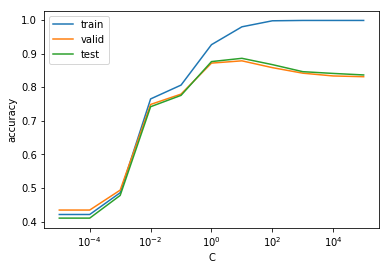

In [60]:
import matplotlib.pyplot as plt

x = np.logspace(-5, 5, 11, base=10)

plt.plot(x, train_acc, label = "train")
plt.plot(x, valid_acc, label = "valid")
plt.plot(x, test_acc, label = "test")

plt.xlabel('C')
plt.ylabel('accuracy')

plt.xscale('log')
plt.legend()

# 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [ ]:
from sklearn.ensemble import RandomForestClassifier

acc = []
for c in tqdm(x):
    clf = LogisticRegression(random_state=0, max_iter=10000, C=c, solver='sag')
    clf.fit(df_train, train['CATEGORY'])
    acc.append(accuracy_score(test['CATEGORY'], clf.predict(df_test)))


# ランダムフォレストとは
# 2001年に Leo Breiman によって提案された[1]機械学習のアルゴリズムであり、分類、回帰、クラスタリングに用いられる。
# 決定木を弱学習器とするアンサンブル学習アルゴリズムであり、
# この名称は、ランダムサンプリングされたトレーニングデータによって学習した多数の決定木を使用することによる。
max_depth_candidate = [2, 4, 8]
for m in tqdm(max_depth_candidate):
    clf = RandomForestClassifier(max_depth=m, random_state=0)
    clf.fit(df_train, train['CATEGORY'])
    acc.append(accuracy_score(test['CATEGORY'], clf.predict(df_test)))

bestIndex = acc.index(max(acc))
if bestIndex < 11:
    bestAlg = 'LogisticRegression'
    bestParam = f'C={x[bestIndex]}'
else:
    bestAlg = 'RandomForestClassifier'
    bestParam = f'max_depth={max_depth_candidate[bestIndex - 4]}'

print(bestAlg, bestParam)

 73%|███████▎  | 8/11 [06:03<03:49, 76.44s/it]